## Importing Pandas, Numpy, And Our Classes

In [2]:
import pandas as pd
import numpy as np
from model import Model
from layer import Linear, ActivationFunc
from loss import Loss
from network import SequentialNetwork
from optimizer import Optimizer, adamOptimizer

<br>

## Top Of Our Dataset

In [3]:
df = pd.read_csv("6class.csv")
df.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


<br>

## Preparing Our Dataset For Training

In [4]:
inputs = np.array(df.drop(['Star type', 'Star color', 'Spectral Class'], axis=1))
truth = np.array(df['Star type'])

truth.shape = (len(truth), 1)

mean = np.mean(inputs, axis=0)
std = np.std(inputs, axis=0)

std[std == 0] = 1e-8

normalized_inputs = (inputs - mean) / std

split_index = int(len(normalized_inputs) * 0.8)

inputs = normalized_inputs[:split_index, :]
ground_truth = truth[:split_index, :]

inputs_test = normalized_inputs[split_index:, :]
ground_truth_test = truth[split_index:, :]

shuffle = np.random.permutation(len(inputs))
inputs = inputs[shuffle]
ground_truth = ground_truth[shuffle]

<br>

## Setting up the Nueral Net

In [5]:
def make_model():
    star_nn = Model()

    star_nn.addLayer(Linear(input_size = 4, output_size = 32))
    star_nn.addLayer(ActivationFunc("relu"))

    star_nn.addLayer(Linear(input_size = 32, output_size = 16))
    star_nn.addLayer(ActivationFunc("relu"))

    star_nn.addLayer(Linear(input_size = 16, output_size = 6))

    star_nn.compile(learning_rate = 1e-2) 
    return star_nn

## Testing Our Trained Data Set on The Rest of the Data

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator
from model import Model

In [7]:
temp='Temperature (K)'
L='Luminosity(L/Lo)'
r='Radius(R/Ro)'
abs_mag='Absolute magnitude(Mv)'
st='Star type'
sc='Star color'
spec='Spectral Class'

In [8]:
def vis(epoch, pred_arr):
    sns.scatterplot(data=df,x=temp,y=abs_mag,hue=pred_arr,palette='Spectral')
    sns.set(rc={'axes.facecolor':'black'})
    plt.gca().invert_yaxis()
    plt.gca().invert_xaxis()
    plt.xscale('log')
    plt.title(f'H-R Diagram (epochs: {epoch})')
    legend = plt.legend()
    frame = legend.get_frame()
    frame.set_facecolor('white')
    plt.xticks([50000,30000, 10000,3000, 1000], ['50000','30000', '10000','3000', '1000'])
    plt.show()

In [9]:
def get_predict(model: Model, epoch):
    label_map = {
        0 : 'Brown Dwarf',
        1 : 'Red Dwarf',
        2 : 'White Dwarf',
        3 : 'Main Sequence',
        4 : 'Supergiant',
        5 : 'Hypergiant'
    }
    model.train(inputs = inputs,truth= ground_truth, epochs = epoch, batch_size = 16)
    pred = model.predict(normalized_inputs)
    pred_arr = np.argmax(pred, axis=1) 
    return_arr = [label_map[x] for x in pred_arr]
    return return_arr    



Starting training:
Training completed!


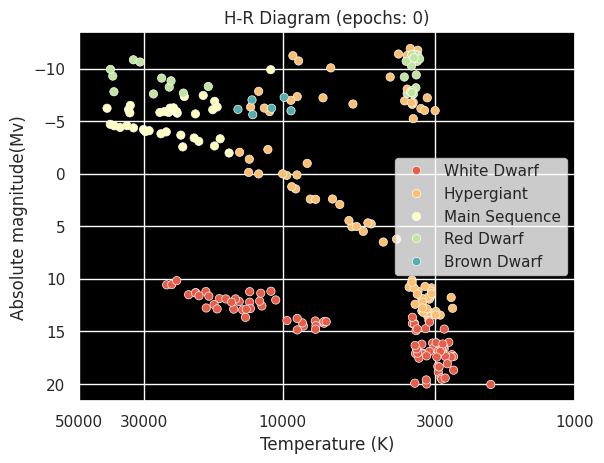

Starting training:
Epoch: 1, Loss: 1.3916
Training completed!


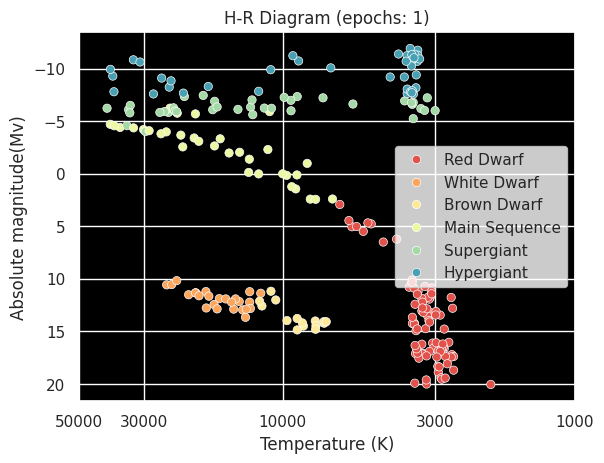

Starting training:
Epoch: 1, Loss: 1.5274
Epoch: 2, Loss: 0.8619
Epoch: 3, Loss: 0.4972
Epoch: 4, Loss: 0.3009
Epoch: 5, Loss: 0.2265
Training completed!


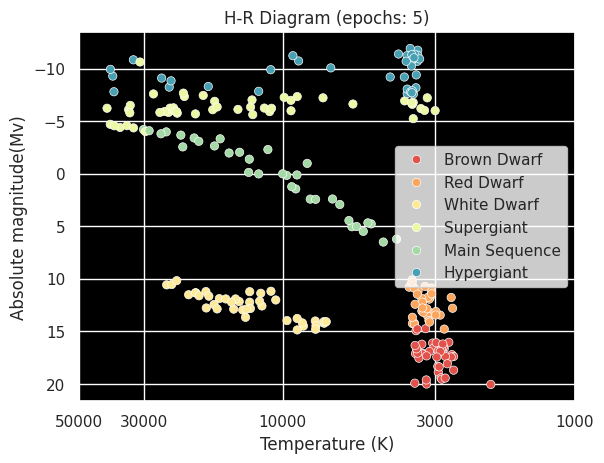

Starting training:
Epoch: 1, Loss: 1.1819
Epoch: 2, Loss: 0.5891
Epoch: 3, Loss: 0.4036
Epoch: 4, Loss: 0.2627
Epoch: 5, Loss: 0.1881
Epoch: 6, Loss: 0.1361
Epoch: 7, Loss: 0.1143
Epoch: 8, Loss: 0.0934
Epoch: 9, Loss: 0.0719
Epoch: 10, Loss: 0.0659
Training completed!


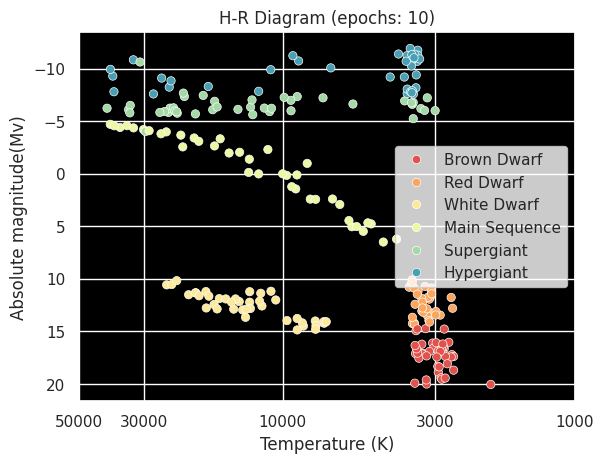

Starting training:
Epoch: 1, Loss: 1.5035
Epoch: 2, Loss: 0.7175
Epoch: 3, Loss: 0.4502
Epoch: 4, Loss: 0.2945
Epoch: 5, Loss: 0.2078
Epoch: 6, Loss: 0.1460
Epoch: 7, Loss: 0.1168
Epoch: 8, Loss: 0.0933
Epoch: 9, Loss: 0.0743
Epoch: 10, Loss: 0.0671
Epoch: 11, Loss: 0.0597
Epoch: 12, Loss: 0.0533
Epoch: 13, Loss: 0.0454
Epoch: 14, Loss: 0.0640
Epoch: 15, Loss: 0.0497
Epoch: 16, Loss: 0.0302
Epoch: 17, Loss: 0.0282
Epoch: 18, Loss: 0.0260
Epoch: 19, Loss: 0.0224
Epoch: 20, Loss: 0.0213
Epoch: 21, Loss: 0.0269
Epoch: 22, Loss: 0.0247
Epoch: 23, Loss: 0.0190
Epoch: 24, Loss: 0.0308
Epoch: 25, Loss: 0.0228
Epoch: 26, Loss: 0.0381
Epoch: 27, Loss: 0.0264
Epoch: 28, Loss: 0.0224
Epoch: 29, Loss: 0.0214
Epoch: 30, Loss: 0.0219
Epoch: 31, Loss: 0.0191
Epoch: 32, Loss: 0.0153
Epoch: 33, Loss: 0.0107
Epoch: 34, Loss: 0.0141
Epoch: 35, Loss: 0.0188
Epoch: 36, Loss: 0.0525
Epoch: 37, Loss: 0.0088
Epoch: 38, Loss: 0.0946
Epoch: 39, Loss: 0.0268
Epoch: 40, Loss: 0.0135
Epoch: 41, Loss: 0.0541
Epoch:

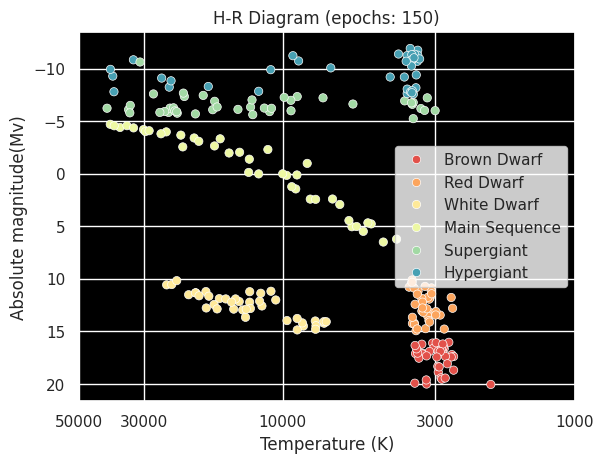

In [14]:
epochs = [0, 1, 5, 10, 150]
for e in epochs:
    model = make_model()
    vis(e, get_predict(model, e))